
# B3. Data preparation 

(Including transforms, scaling, re-shaping and any feature selection to reduce dimensionality. Summary of cleaned/pre-processed data)

The plant ID column and Source Key columns will likely be removed for any predictive analysis. 

The DC and AC power units are kW, which implies the same for Daily_Yield and TOTAL_YIELD. Likely, those will be reduced to GW, as is more common for production rates of that size. 

There are about 68,000 rows. Not a massive dataset, but it might be worth parallelizing some functions later. 

There are no NA's in the first power generation dataframe. 

The datetime column is listed as an 'object' type and likely needs to be converted to a pandas datetime type 

Presumably, irradiation is in units of W/m^2 but that may be incorrect. It will be the assumption going forward but it cannot be confirmed without more information. 

These examinations of the given data are repeated for each data set to determine their basic parameters.


## B3.1 Feature Engineering- Feature selection and extraction

Note: For further analysis only the data derived from solar plant 1 is being used.

<b>Below is Select Features by Strength of Relationship to Target using SelectKBest function</b>

Sklearn provides the SelectKBest() function to select a given number of features using a univariate statistical test. The statistical test function looks for the features that have the strongest relationship with the target feature. We need to use different statistical tests depending on whether we are performing a classification or regression task. Here regression was used. 


In [1]:
#importing all the libraries

import numpy as np # numpy array and performing algebraic operations
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #data visualisation and plots
import matplotlib.pyplot as plt #data visualisation and plots

In [2]:
new_data = pd.read_csv('C:/Users/arjyo/PycharmProjects/PRML_Stage2/output/new_data.csv')
new_data

,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME,DATE,Target
0,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0,0:00:00,15/05/2020,0
1,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,25.184316,22.857507,0.0,0:00:00,15/05/2020,0
2,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,25.184316,22.857507,0.0,0:00:00,15/05/2020,0
3,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,25.184316,22.857507,0.0,0:00:00,15/05/2020,0
4,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,25.184316,22.857507,0.0,0:00:00,15/05/2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45675,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,21.909288,20.427972,0.0,23:45:00,17/06/2020,0
45676,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,21.909288,20.427972,0.0,23:45:00,17/06/2020,0
45677,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,21.909288,20.427972,0.0,23:45:00,17/06/2020,0
45678,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,21.909288,20.427972,0.0,23:45:00,17/06/2020,0


In [4]:
new_data.keys()

Index(['PLANT_ID_x', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'TIME', 'DATE', 'Target'],
      dtype='object')

In [26]:
X = new_data[['DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION']]
y = new_data[['Target']]

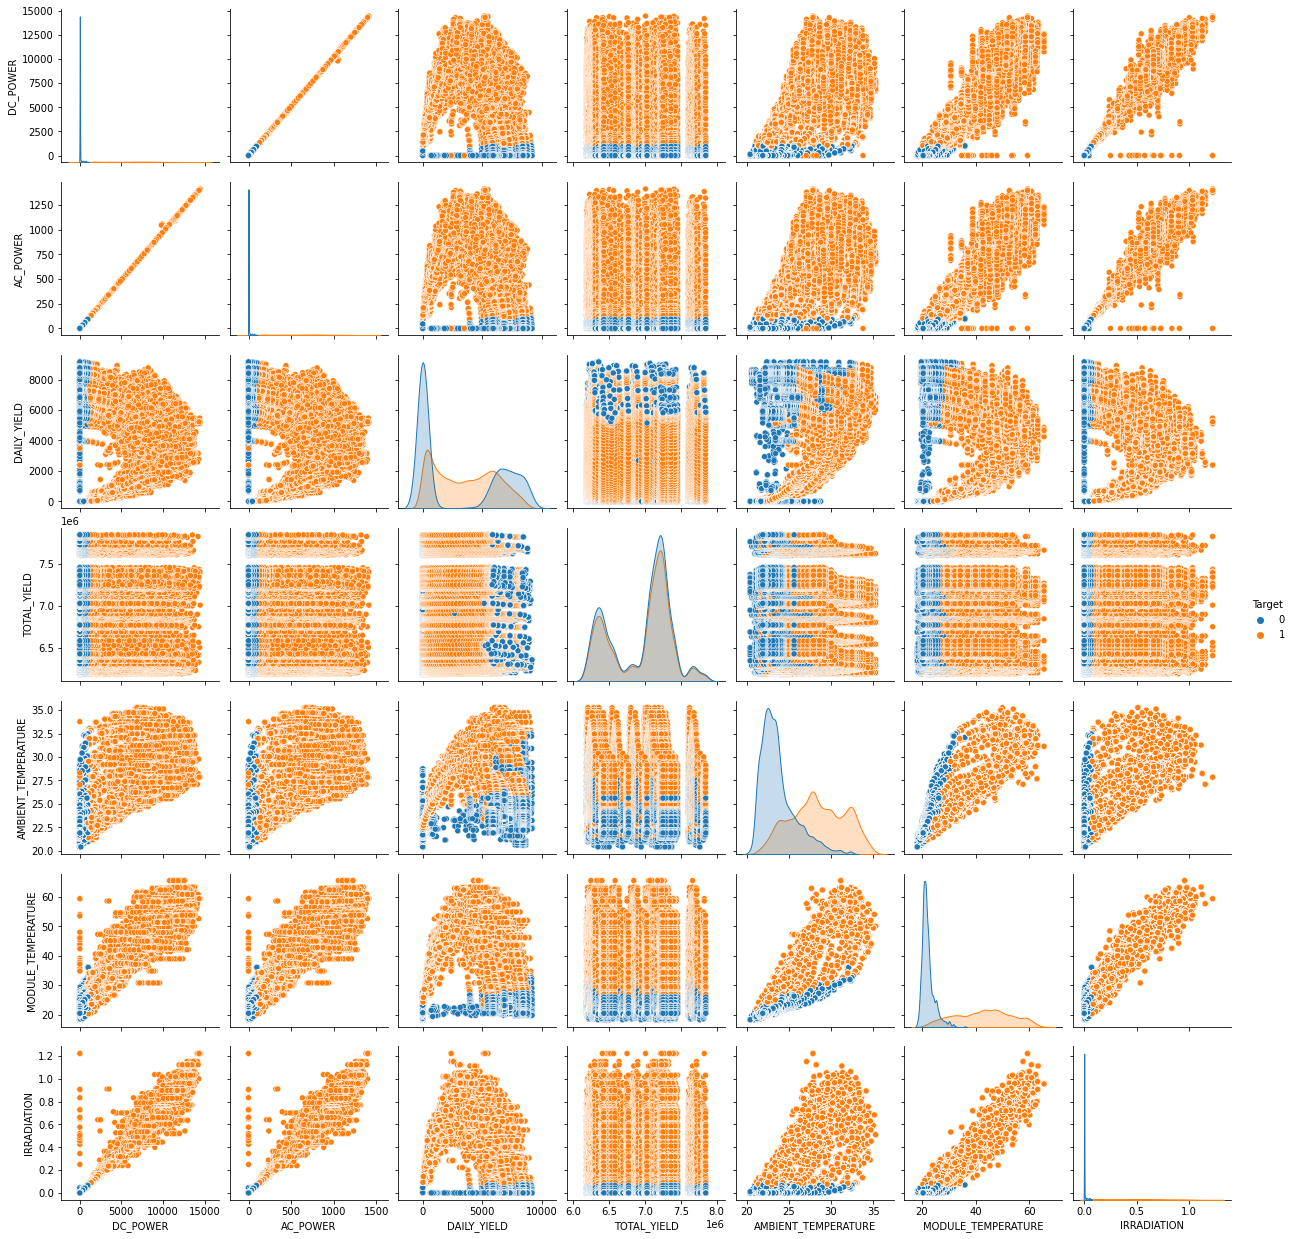

In [33]:
sns.pairplot(new_data,hue= 'Target',vars=['DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION'])

<b>The above pairplot shows the relationship of target variable on the other corresponding features. A vertically straight line indicates that the x-axis is not changing with the respective feature. A linear relationship is shown by a sloped line between x axis and y-axis. A curve shows a higher coefficient of the equation between the two variables on x and y axis.</b> 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state=7)

In [28]:
X_train.shape

(30605, 7)

In [29]:
X_test.shape

(15075, 7)

In [30]:
y_train.shape

(30605, 1)

In [31]:
y_test.shape

(15075, 1)

In [32]:
# Perform feature selection using a univariate statistical test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif # for classification tasks
from sklearn.feature_selection import f_regression # for regression tasks

ravel()

kbest = SelectKBest(score_func=f_regression, k=3)
kbest.fit(X_train, y_train)

print("Feature selection", kbest.get_support())


Feature selection [ True  True False False False  True False]


C:\Users\arjyo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
print("Feature scores", kbest.scores_)


Feature scores [6.05850167e+04 6.09743807e+04 1.48492639e+02 6.05708746e-01
 2.38499823e+04 6.22809633e+04 5.60767505e+04]


In [35]:
print("Selected features:", list(X.columns[kbest.get_support()]))


Selected features: ['DC_POWER', 'AC_POWER', 'MODULE_TEMPERATURE']


In [36]:
print("Removed features:", list(X.columns[~kbest.get_support()]))

Removed features: ['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']


<b>From above results we can see that the best features seem to be DC Power, AC Power and Module Temperature. But the domain engineering suggests that ambient temperature and irradiation are also equally important. Hence for modelling purpose, these features are also kept.The target is now to determine the irradiation levels which will help us predict the solar power generation.</b> 